In [25]:
import pandas as pd

In [26]:
data=pd.read_csv('../data/data.csv')

In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
subset = data.iloc[:, 5:]

# 计算每行的最大值并形成新的一列
data['磁通密度峰值'] = subset.max(axis=1)

data['峰峰值'] = subset.max(axis=1) - subset.min(axis=1)

In [28]:
X=pd.concat([pd.get_dummies(data[['磁芯材料', '温度，oC','励磁波形']]).reset_index(drop=True),data[['频率，Hz','磁通密度峰值', '峰峰值']].reset_index(drop=True)],axis=1)

Y = data['磁芯损耗，w/m3'].copy()

In [29]:
print(X.shape)
print(X.columns)
X

(12400, 11)
Index(['温度，oC', '磁芯材料_材料1', '磁芯材料_材料2', '磁芯材料_材料3', '磁芯材料_材料4', '励磁波形_三角波',
       '励磁波形_梯形波', '励磁波形_正弦波', '频率，Hz', '磁通密度峰值', '峰峰值'],
      dtype='object')


,温度，oC,磁芯材料_材料1,磁芯材料_材料2,磁芯材料_材料3,磁芯材料_材料4,励磁波形_三角波,励磁波形_梯形波,励磁波形_正弦波,频率，Hz,磁通密度峰值,峰峰值
0,25,1,0,0,0,0,0,1,50030,0.028849,0.057689
1,25,1,0,0,0,0,0,1,50020,0.031419,0.062846
2,25,1,0,0,0,0,0,1,50020,0.035535,0.071047
3,25,1,0,0,0,0,0,1,50020,0.040015,0.080041
4,25,1,0,0,0,0,0,1,50030,0.045028,0.090113
...,...,...,...,...,...,...,...,...,...,...,...
12395,90,0,0,0,1,0,1,0,199190,0.034867,0.069047
12396,90,0,0,0,1,0,1,0,199190,0.038341,0.075923
12397,90,0,0,0,1,0,1,0,199190,0.048877,0.096811
12398,90,0,0,0,1,0,1,0,199190,0.054889,0.108769


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# 定义模型
# model_1 = DecisionTreeRegressor(random_state=42)
model = RandomForestRegressor(n_estimators=100)
model.fit(X, Y)

RandomForestRegressor()

# 第四题测试

In [31]:
# data2=pd.read_excel('../data/附件三（测试集）.xlsx')
# data2

# subset = data2.iloc[:, 5:]

# # 计算每行的最大值并形成新的一列
# data2['磁通密度峰值'] = subset.max(axis=1)

# # 计算峰峰值
# data2['峰峰值'] = subset.max(axis=1) - subset.min(axis=1)

# X_predict = pd.concat(
#     [
#         pd.get_dummies(data2[["磁芯材料", "温度，oC", "励磁波形"]]).reset_index(drop=True),
#         data2[["频率，Hz", "磁通密度峰值", "峰峰值"]].reset_index(drop=True),
#     ],
#     axis=1,
# )

# print(X_predict.columns)

# # 模型预测
# Y_pred_1 = model_1.predict(X_predict)
# Y_pred_2 = model_2.predict(X_predict)
# Y_pred_3 = model_3.predict(X_predict)

# # 集成：加权平均(采用直接网格搜索的权重)
# Y_pred_ensemble = (Y_pred_1 * 0.8 + Y_pred_2 * 0.1 + Y_pred_3 * 0.1)
# # Y_pred_ensemble = Y_pred_1
# # 将结果保留一位小数
# Y_pred_ensemble = np.round(Y_pred_ensemble, decimals=1)
# print(Y_pred_ensemble.shape)

# data_to=pd.read_excel('../data/附件四（Excel表）_Q1.xlsx')

# # data_to['附件三（400个样品）磁芯损耗预测结果']=model.predict(X_predict)
# data_to['附件三（400个样品）磁芯损耗预测结果']=Y_pred_ensemble

# idx = [15,75,97,125,167,229,270,337,347,378]

# data_to.iloc[idx]

In [32]:
X.columns

Index(['温度，oC', '磁芯材料_材料1', '磁芯材料_材料2', '磁芯材料_材料3', '磁芯材料_材料4', '励磁波形_三角波',
       '励磁波形_梯形波', '励磁波形_正弦波', '频率，Hz', '磁通密度峰值', '峰峰值'],
      dtype='object')

In [33]:
# 模型预测
Y_pred = model.predict(X)

In [34]:
df=pd.DataFrame()

In [35]:
# 计算传输磁能
df["传输磁能"] = X["频率，Hz"] * X["磁通密度峰值"]

# 找到最大传输磁能所在的行索引
max_row_index = df["传输磁能"].idxmax()

# 查看该行的其它数据
max_row_data = X.loc[max_row_index]
max_row_data


温度，oC           70.000000
磁芯材料_材料1         1.000000
磁芯材料_材料2         0.000000
磁芯材料_材料3         0.000000
磁芯材料_材料4         0.000000
励磁波形_三角波         1.000000
励磁波形_梯形波         0.000000
励磁波形_正弦波         0.000000
频率，Hz       354610.000000
磁通密度峰值           0.218857
峰峰值              0.436308
Name: 2867, dtype: float64

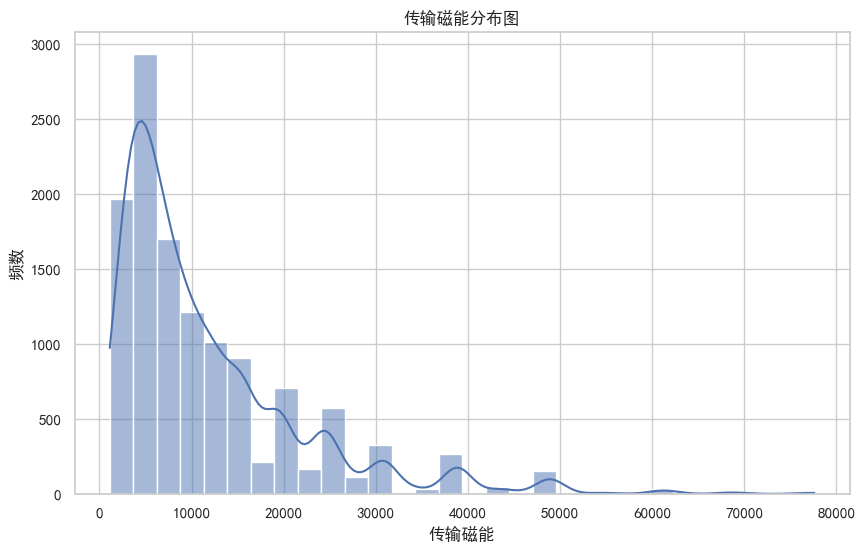

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] # 中文支持
plt.rcParams['axes.unicode_minus']=False

# 绘制传输磁能的分布图
plt.figure(figsize=(10, 6))
sns.histplot(df["传输磁能"], bins=30, kde=True)
plt.title("传输磁能分布图")
plt.xlabel("传输磁能")
plt.ylabel("频数")
plt.show()


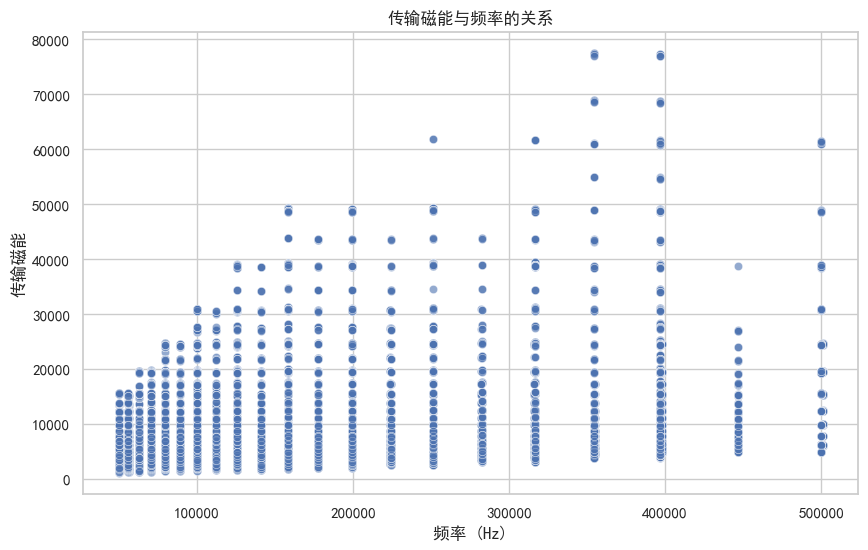

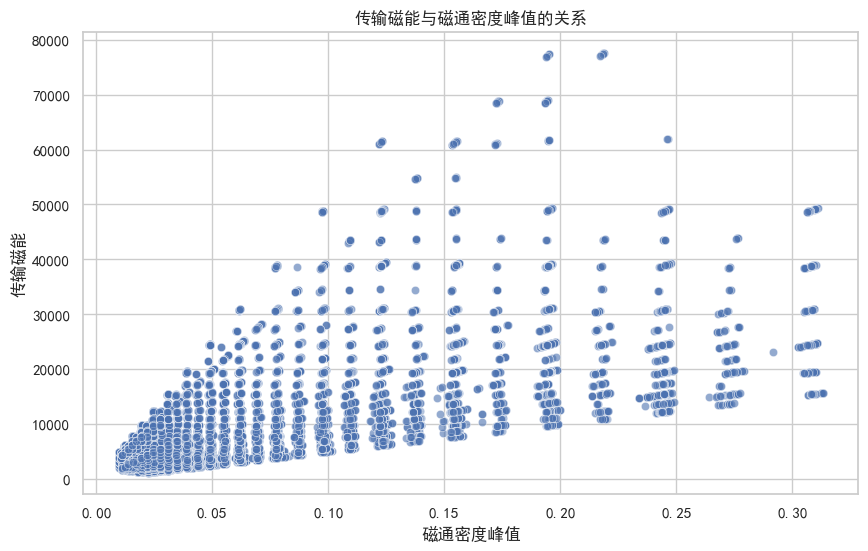

In [46]:
X_1 = X.copy()
X_1['传输磁能']=df['传输磁能']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_1, x="频率，Hz", y="传输磁能", alpha=0.6)
plt.title("传输磁能与频率的关系")
plt.xlabel("频率 (Hz)")
plt.ylabel("传输磁能")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_1, x="磁通密度峰值", y="传输磁能", alpha=0.6)
plt.title("传输磁能与磁通密度峰值的关系")
plt.xlabel("磁通密度峰值")
plt.ylabel("传输磁能")
plt.show()



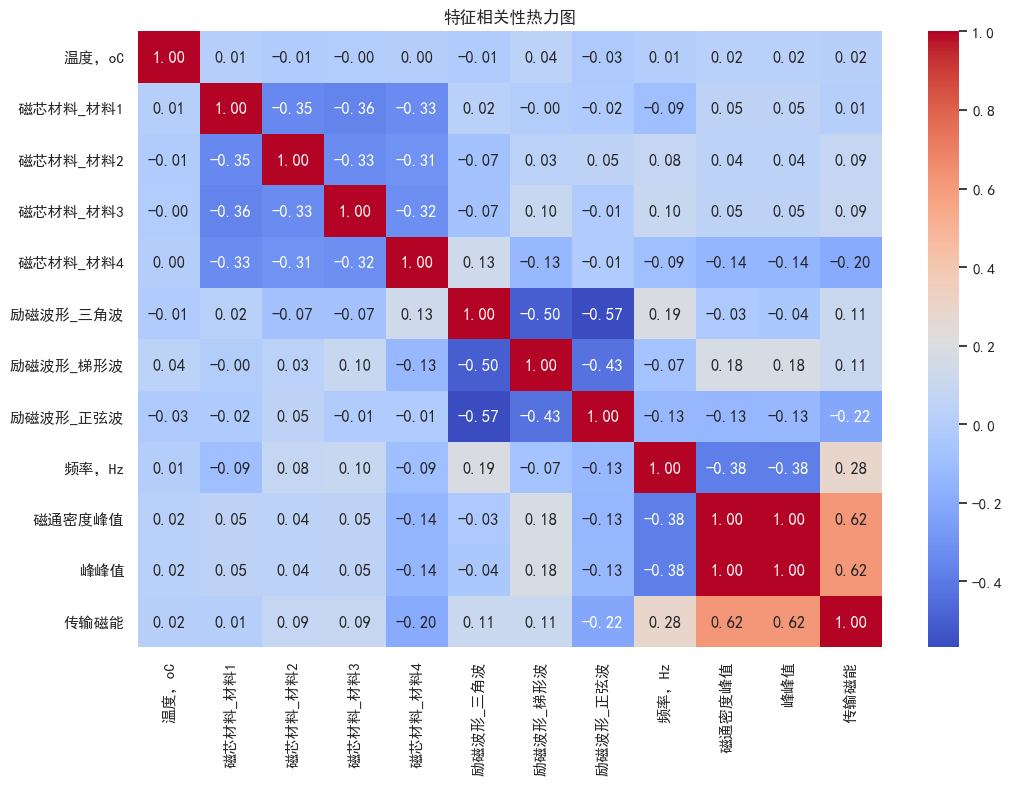

In [47]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("特征相关性热力图")
plt.show()


In [43]:
X.columns

Index(['温度，oC', '磁芯材料_材料1', '磁芯材料_材料2', '磁芯材料_材料3', '磁芯材料_材料4', '励磁波形_三角波',
       '励磁波形_梯形波', '励磁波形_正弦波', '频率，Hz', '磁通密度峰值', '峰峰值', '传输磁能'],
      dtype='object')

In [13]:
# '温度，oC'：[25, 50, 70, 90]
#  '磁芯材料_材料1', '磁芯材料_材料2', '磁芯材料_材料3', '磁芯材料_材料4', '励磁波形_三角波',
#        '励磁波形_梯形波', '励磁波形_正弦波':[1,0]
# '频率，Hz':[49990，501180]

# '磁通密度峰值':[0.00963815，0.313284469]

In [14]:
X['磁通密度峰值'].max()

0.313284469

In [15]:
X['磁通密度峰值'].min()

0.00963815

In [16]:
X['峰峰值'].max()

0.625702812

In [17]:
X['峰峰值'].min()

0.019089317

In [18]:
print(X['频率，Hz'].max())
print(X['频率，Hz'].min())

501180
49990


In [19]:
#分析在什么条件下（温度、频率、波形、磁通密度峰值及磁芯材料），能达到最小的磁芯损耗以及具有最大的传输磁能

第 0 代：最佳适应度 = 83719.143991
第 1 代：最佳适应度 = 77756.748166
第 2 代：最佳适应度 = 76788.192583
第 3 代：最佳适应度 = 56824.001299
第 4 代：最佳适应度 = 39349.581608
第 5 代：最佳适应度 = 39349.581608
第 6 代：最佳适应度 = 36579.907001
第 7 代：最佳适应度 = 32712.343219
第 8 代：最佳适应度 = 32712.343219
第 9 代：最佳适应度 = 32606.371174
第 10 代：最佳适应度 = 32606.371174
第 11 代：最佳适应度 = 30479.462796
第 12 代：最佳适应度 = 30479.462796
第 13 代：最佳适应度 = 30479.462796
第 14 代：最佳适应度 = 27458.044304
第 15 代：最佳适应度 = 27189.468470
第 16 代：最佳适应度 = 27189.468470
第 17 代：最佳适应度 = 27189.468470
第 18 代：最佳适应度 = 26291.578573
第 19 代：最佳适应度 = 26291.578573
第 20 代：最佳适应度 = 26291.578573
第 21 代：最佳适应度 = 26291.578573
第 22 代：最佳适应度 = 26291.578573
第 23 代：最佳适应度 = 26291.578573
第 24 代：最佳适应度 = 26246.069775
第 25 代：最佳适应度 = 26246.069775
第 26 代：最佳适应度 = 26246.069775
第 27 代：最佳适应度 = 26246.069775
第 28 代：最佳适应度 = 26180.595451
第 29 代：最佳适应度 = 26180.595451
第 30 代：最佳适应度 = 26178.144524
第 31 代：最佳适应度 = 26178.144524
第 32 代：最佳适应度 = 26178.085841
第 33 代：最佳适应度 = 26177.594679
第 34 代：最佳适应度 = 26177.407552
第 35 代：最佳适应度 = 26177.402611
第 

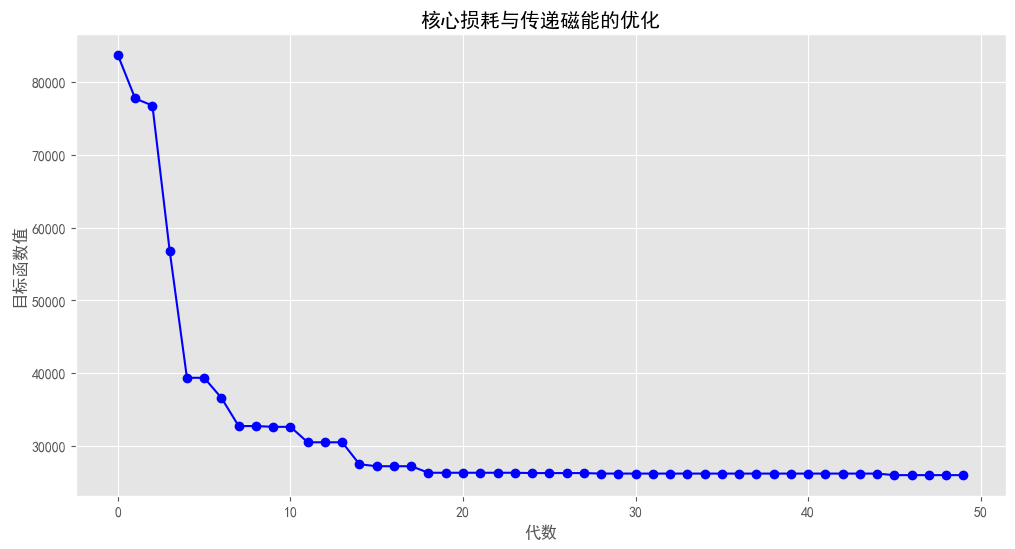


最佳条件：
温度，oC: 90
磁芯材料: 材料2
励磁波形: 正弦波
频率，Hz: 51112.666207250666
磁通密度峰值: 0.030291446858966863
峰峰值: 0.04626852021352368


In [20]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use("ggplot")
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 中文支持
plt.rcParams["axes.unicode_minus"] = False


# 定义
temperatures = [25, 50, 70, 90]
materials = ["材料1", "材料2", "材料3", "材料4"]
waveforms = ["三角波", "梯形波", "正弦波"]
freq_min, freq_max = 49990, 501180
flux_density_min, flux_density_max = 0.00963815, 0.313284469
peak2peak_min, peak2peak_max = 0.019089317, 0.625702812

# 设置遗传算法（GA）
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # 最小化核损耗
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# 属性生成器
toolbox.register("attr_temperature", random.randint, 0, len(temperatures) - 1)
toolbox.register("attr_material", random.randint, 0, len(materials) - 1)
toolbox.register("attr_waveform", random.randint, 0, len(waveforms) - 1)
toolbox.register("attr_frequency", random.uniform, freq_min, freq_max)
toolbox.register(
    "attr_flux_density", random.uniform, flux_density_min, flux_density_max
)
toolbox.register("attr_peak2peak", random.uniform, peak2peak_min, peak2peak_max)


# 结构初始化器
toolbox.register(
    "individual",
    tools.initCycle,
    creator.Individual,
    (
        toolbox.attr_temperature,
        toolbox.attr_material,
        toolbox.attr_waveform,
        toolbox.attr_frequency,
        toolbox.attr_flux_density,
        toolbox.attr_peak2peak,
    ),
    n=1,
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# 评估函数
def evaluate(individual):
    temp_idx, mat_idx, wave_idx, freq, flux_density, peak2peak = individual
    # temp_idx, mat_idx, wave_idx, freq, flux_density = individual
    

    # 确保索引是整数
    temp_idx = int(round(temp_idx))
    mat_idx = int(round(mat_idx))
    wave_idx = int(round(wave_idx))

    data = {
        "温度，oC": [temperatures[temp_idx]],
        "磁芯材料_材料1": [1 if mat_idx == 0 else 0],
        "磁芯材料_材料2": [1 if mat_idx == 1 else 0],
        "磁芯材料_材料3": [1 if mat_idx == 2 else 0],
        "磁芯材料_材料4": [1 if mat_idx == 3 else 0],
        "励磁波形_三角波": [1 if wave_idx == 0 else 0],
        "励磁波形_梯形波": [1 if wave_idx == 1 else 0],
        "励磁波形_正弦波": [1 if wave_idx == 2 else 0],
        "频率，Hz": [freq],
        "磁通密度峰值": [flux_density],
        "峰峰值": [peak2peak],
    }
    X = pd.DataFrame(data)

    core_loss = model.predict(X)[0]
    

    # 传递的磁能与峰值磁通密度成正比
    transmitted_energy = flux_density

    # 目标：最小化核损耗，最大化传递的磁能
    # 为简化，定义一个目标函数，将二者结合
    # 使用核损耗与传递能量的比值，添加一个很小的 epsilon 以避免除以零
    epsilon = 1e-6
    objective = core_loss / (transmitted_energy + epsilon)
    # print(core_loss[0], transmitted_energy)
    return (objective,)


toolbox.register("evaluate", evaluate)


# 自定义交叉操作
def custom_crossover(ind1, ind2):
    # 对整数变量（索引 0-2）进行交换
    for i in [0, 1, 2]:
        if random.random() < 0.5:
            ind1[i], ind2[i] = ind2[i], ind1[i]
    # 对连续变量（索引 3,4）使用混合交叉
    alpha = 0.5
    for i in [3, 4, 5]:
        gamma = (1.0 + 2.0 * alpha) * random.random() - alpha
        val1 = ind1[i]
        val2 = ind2[i]
        ind1[i] = (1.0 - gamma) * val1 + gamma * val2
        ind2[i] = gamma * val1 + (1.0 - gamma) * val2
        # 确保变量在范围内
        if i == 3:
            ind1[i] = min(max(ind1[i], freq_min), freq_max)
            ind2[i] = min(max(ind2[i], freq_min), freq_max)
        elif i == 4:
            ind1[i] = min(max(ind1[i], flux_density_min), flux_density_max)
            ind2[i] = min(max(ind2[i], flux_density_min), flux_density_max)
        elif i == 5:
            ind1[i] = min(max(ind1[i], peak2peak_min), peak2peak_max)
            ind2[i] = min(max(ind2[i], peak2peak_min), peak2peak_max)
    return ind1, ind2


toolbox.register("mate", custom_crossover)


# 自定义突变操作
def custom_mutate(individual, indpb):
    # 突变温度索引
    if random.random() < indpb:
        individual[0] = random.randint(0, len(temperatures) - 1)
        # individual[0] = 0
    # 突变材料索引
    if random.random() < indpb:
        individual[1] = random.randint(0, len(materials) - 1)
        # individual[1] = 0
    # 突变波形索引
    if random.random() < indpb:
        individual[2] = random.randint(0, len(waveforms) - 1)
        # individual[2] = 2
    # 突变频率
    if random.random() < indpb:
        individual[3] += random.gauss(0, (freq_max - freq_min) * 0.1)
        # 确保在范围内
        individual[3] = min(max(individual[3], freq_min), freq_max)
        # individual[3] = 56320
    # 突变峰值磁通密度
    if random.random() < indpb:
        individual[4] += random.gauss(0, (flux_density_max - flux_density_min) * 0.1)
        # 确保在范围内
        individual[4] = min(max(individual[4], flux_density_min), flux_density_max)
        # individual[4] = 0.06242967
    # 突变峰峰值
    if random.random() < indpb:
        individual[5] += random.gauss(0, (peak2peak_max - peak2peak_min) * 0.1)
        # 确保在范围内
        individual[5] = min(max(individual[5], peak2peak_min), peak2peak_max) 
        # individual[5] = 0.12
    return (individual,)


toolbox.register("mutate", custom_mutate, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# 运行遗传算法（GA）
population = toolbox.population(n=100)
NGEN = 50
best_individuals = []
fitness_values = []

for gen in range(NGEN):
    # 克隆种群
    offspring = list(map(toolbox.clone, population))
    # 应用交叉和突变
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # 评估适应度无效的个体
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # 选择下一代种群
    population = toolbox.select(offspring, k=len(population))

    # 记录最佳个体
    top_ind = tools.selBest(population, k=1)[0]
    best_individuals.append(top_ind)
    fitness_values.append(top_ind.fitness.values[0])
    print(f"第 {gen} 代：最佳适应度 = {top_ind.fitness.values[0]:.6f}")

# 提取用于绘图的数据
generations = range(NGEN)
best_fitness = fitness_values

# 绘制迭代图
plt.figure(figsize=(12, 6))
plt.plot(generations, best_fitness, marker="o", linestyle="-", color="b")
plt.title("核心损耗与传递磁能的优化")
plt.xlabel("代数")
plt.ylabel("目标函数值")
plt.grid(True)
plt.show()

# 提取最佳个体
best_ind = tools.selBest(population, k=1)[0]
temp_idx, mat_idx, wave_idx, freq, flux_density, peak2peak = best_ind
# temp_idx, mat_idx, wave_idx, freq, flux_density = best_ind

# 确保索引是整数
temp_idx = int(round(temp_idx))
mat_idx = int(round(mat_idx))
wave_idx = int(round(wave_idx))

optimal_conditions = {
    "温度，oC": temperatures[temp_idx],
    "磁芯材料": materials[mat_idx],
    "励磁波形": waveforms[wave_idx],
    "频率，Hz": freq,
    "磁通密度峰值": flux_density,
    "峰峰值": peak2peak,
}

print("\n最佳条件：")
for key, value in optimal_conditions.items():
    print(f"{key}: {value}")

# 可视化最终种群的参数分布
df = pd.DataFrame(
    [
        {
            "温度，oC": temperatures[int(round(ind[0]))],
            "磁芯材料": materials[int(round(ind[1]))],
            "励磁波形": waveforms[int(round(ind[2]))],
            "频率，Hz": ind[3],
            "磁通密度峰值": ind[4],
            # "峰峰值": ind[5],
            "目标值": ind.fitness.values[0],
        }
        for ind in population
    ]
)

In [21]:
best_fitness_value = min(fitness_values)
print(f"最佳组合的目标值为：{best_fitness_value:.6f}")


最佳组合的目标值为：25964.928067


In [23]:
# 提取最佳个体
best_ind = tools.selBest(population, k=1)[0]
temp_idx, mat_idx, wave_idx, freq, flux_density, peak2peak = best_ind
# temp_idx, mat_idx, wave_idx, freq, flux_density = best_ind
# 确保索引是整数
temp_idx = int(round(temp_idx))
mat_idx = int(round(mat_idx))
wave_idx = int(round(wave_idx))

# 创建最佳个体对应的数据
data = {
    '温度，oC': [temperatures[temp_idx]],
    '磁芯材料_材料1': [1 if mat_idx == 0 else 0],
    '磁芯材料_材料2': [1 if mat_idx == 1 else 0],
    '磁芯材料_材料3': [1 if mat_idx == 2 else 0],
    '磁芯材料_材料4': [1 if mat_idx == 3 else 0],
    '励磁波形_三角波': [1 if wave_idx == 0 else 0],
    '励磁波形_梯形波': [1 if wave_idx == 1 else 0],
    '励磁波形_正弦波': [1 if wave_idx == 2 else 0],
    '频率，Hz': [freq],
    '磁通密度峰值': [flux_density],
    '峰峰值': [peak2peak],
}
X = pd.DataFrame(data)

# 计算磁芯损耗

core_loss = model.predict(X)[0]
# core_loss = model_1.predict(X)[0]

# 传输磁能等于峰值磁通密度
transmitted_energy = flux_density * freq

print(f"最佳组合时的磁芯损耗为：{core_loss:.6f}")
print(f"最佳组合时的传输磁能为：{transmitted_energy:.6f}")


最佳组合时的磁芯损耗为：786.541219
最佳组合时的传输磁能为：1548.276612


In [36]:
# 【腾讯文档】2024华为杯研赛成品助攻预定文档
# https://docs.qq.com/doc/DYW9LaWdDU2NDcmVD